# Covid 19 Analysis

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL Data 
from bs4 import BeautifulSoup # Manipulates URL Data
import json
from pandas import DataFrame as df

## Grab Data from URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
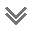

In [4]:
web_page = requests.get("https://www.worldometers.info/coronavirus/")
soup = BeautifulSoup(web_page.text, 'html.parser') 
print(soup.prettify())

## Basic Covid Data

In [12]:
covid_data = soup.find_all("div", class_ = "maincounter-number")
print("Coronavirus Cases: ", covid_data[0].text.strip())
print("Coronavirus Deaths: ", covid_data[1].text.strip())
print("Coronavirus Recoveries: ", covid_data[2].text.strip())
# print()
# data = soup.find_all("script", {"type": "text/javascript"})
# for content in data:
#     print(content)



Coronavirus Cases:  503,262,202
Coronavirus Deaths:  6,218,742
Coronavirus Recoveries:  453,647,459



In [14]:
results = soup.find(id='main_table_countries_today')
content = results.find_all('td')
# content

In [21]:
clean_data = ""
for data in content:
    clean_data += data.text.strip() + "|"
    clean_data = clean_data.replace("+", "") 
    clean_data = clean_data.replace("N/A", "0") 
# clean_data

## Cleaning Up with Regex

In [26]:
import re

#List of countries from the website
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

# len(countries)
for c in countries:
    pattern= c+"[,|\d]*"
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None:
        print(data.group())

USA|82,252,965||1,014,902||80,095,639|292|1,142,424|1,536|245,929|3,034|994,742,849|2,974,186|334,458,823|
Spain|11,662,214||103,266||11,120,708||438,240|368|249,262|2,207|471,036,328|10,067,670|46,787,024|
Italy|15,533,012||161,336||14,144,014||1,227,662|420|257,581|2,675|208,014,099|3,449,452|60,303,524|
France|27,447,397||143,910||24,635,972||2,667,515|1,541|418,848|2,196|260,504,402|3,975,303|65,530,697|
Germany|23,362,800|85,484|133,304|89|19,674,300|229,700|3,555,196|1,980|277,267|1,582|122,332,384|1,451,827|84,260,978|
UK|21,747,638||171,396||20,048,794||1,527,448|355|317,386|2,501|512,140,269|7,474,209|68,520,995|
Turkey|14,983,158||98,514||14,705,256||179,388|975|174,314|1,146|156,696,697|1,823,011|85,954,904|
Iran|7,204,049|1,994|140,777|33|6,938,480|3,816|124,792|1,441|83,859|1,639|50,079,995|582,956|85,906,977|
Russia|18,053,359|11,432|373,027|261|17,340,639|19,523|339,693|2,300|123,614|2,554|273,400,000|1,872,014|146,045,885|
Brazil|30,234,024||661,855||29,191,158||381,011

## Working with CSV Data

<AxesSubplot:xlabel='date'>

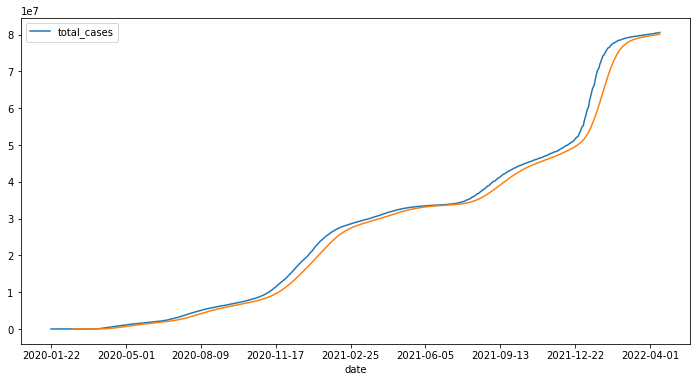

In [40]:
owid_df = pd.read_csv('owid-covid-data.csv')
owid_df.columns
country_df= owid_df.location.unique()

# country_df.size

indexer = owid_df[owid_df['location']=='United States'].index
us_tc = owid_df.loc[indexer, 'date':'total_cases']
us_tc = us_tc.dropna()
us_tc.set_index('date', inplace=True)
us_tc.plot(figsize=(12,6))
us_tc.rolling(window=30).mean()['total_cases'].plot()

## Do lockdowns work?

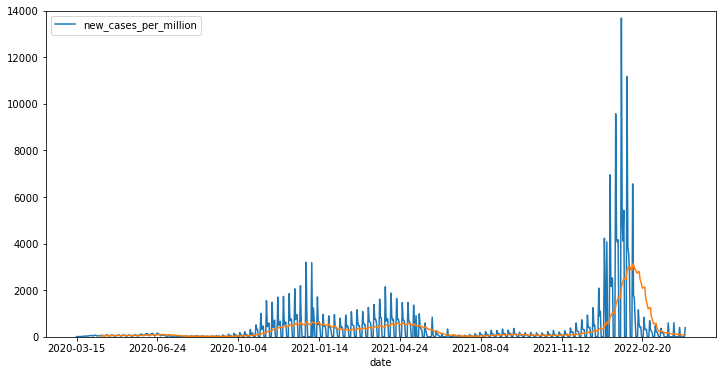

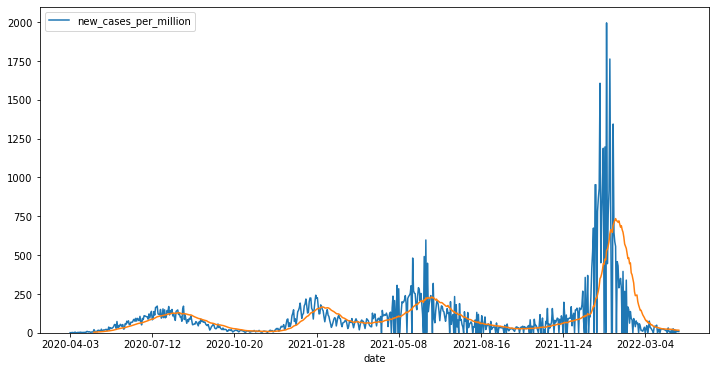

In [62]:
def plot_covid_data(country, col, plot_ma=False, y_max=200):
    indexer = owid_df[owid_df['location']==country].index
    country_df = owid_df.loc[indexer, 'date':col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace=True)
    country_df.drop(columns=country_df.columns.difference([col]), inplace=True)
    country_df.plot(figsize=(12,6), ylim=[0, y_max])
    
    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()
        
plot_covid_data('Sweden', 'new_cases_per_million', True, 14000)
plot_covid_data('Bolivia', 'new_cases_per_million', True, 2100)

## How Does Median Age Effect Death Rate?

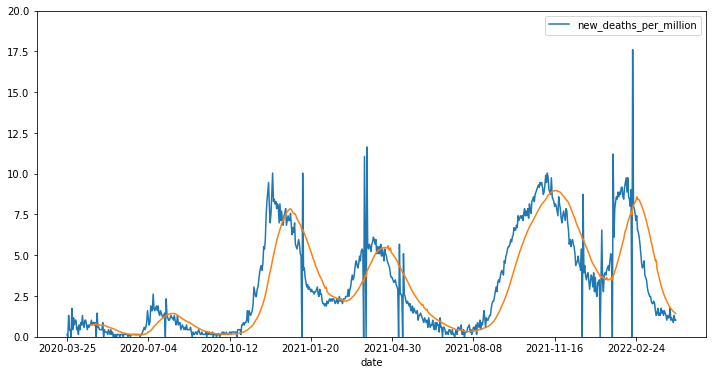

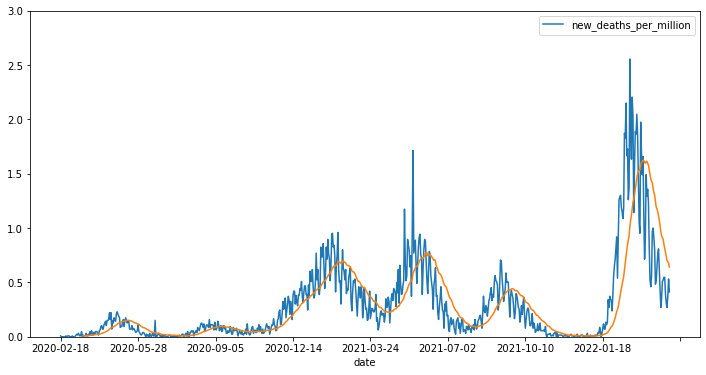

In [64]:
plot_covid_data('Serbia', 'new_deaths_per_million', True, 20)
plot_covid_data('Japan', 'new_deaths_per_million', True, 3)

## How Does Obesity Effect Death Rate?

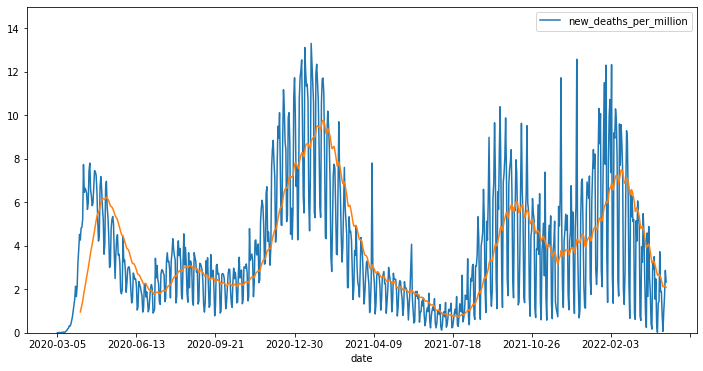

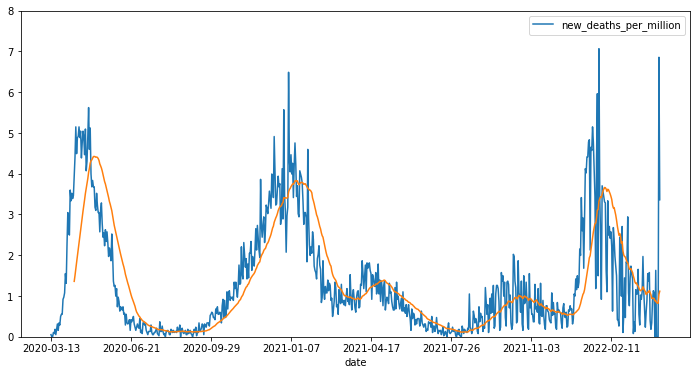

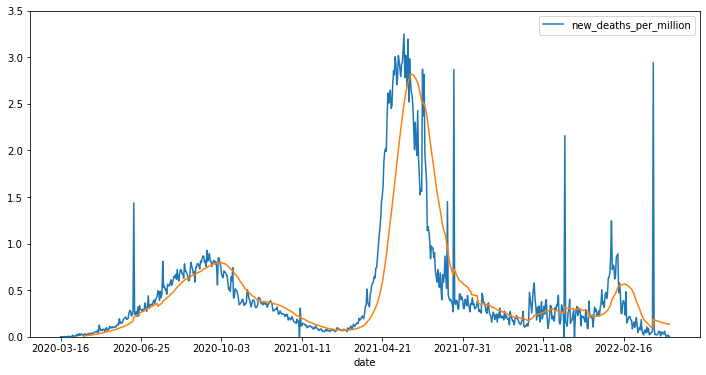

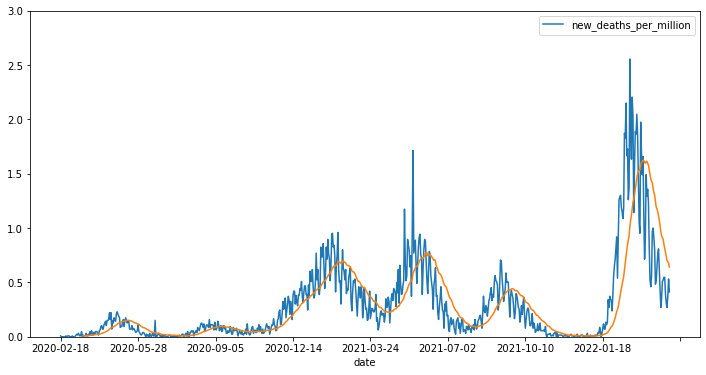

In [69]:
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
plot_covid_data('Canada', 'new_deaths_per_million', True, 8)
plot_covid_data('India', 'new_deaths_per_million', True, 3.5)
plot_covid_data('Japan', 'new_deaths_per_million', True, 3)

## How Does Diabetes Prevalence Effect Death Rate?